# Contents

01. Importing libraries
02. Importing data
03. Data manipulations
04. Elbow technique
05. k-Means Clustering

### 01. Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# Allow matplotlib visuals
%matplotlib inline

### 02. Importing data

In [3]:
# Import main folder
path = r'C:\Users\amwil\OneDrive\Career Foundry Project Work\07-2021 ABNB NYC Data Analysis'

In [4]:
# Import AB_NYC_2019_cleaned.csv
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'AB_NYC_2019_Visually_Explored.csv'), index_col = False)

In [5]:
#Check beginning of df
df.head()

,Listing id,Host id,Borough,Neighborhood,Latitude,Longitude,Room type,Price,Minimum nights for rent,Number of reviews,Last review,Reviews per month,Number of listings per host,Availability per year,Price category
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9,2018-10-19,0.210000,6,365,Middle price
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45,2019-05-21,0.380000,2,355,High price
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0,2019-06-23,1.373221,1,365,Middle price
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270,2019-07-05,4.640000,1,194,Low price
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9,2018-11-19,0.100000,1,0,Low price


In [6]:
# Check shape of df
df.shape

(48895, 15)

### 03. Data manipulations

In [7]:
# Drop categorical columns not needed for analysis
df = df.drop(columns = ['Listing id'])
df = df.drop(columns = ['Host id'])
df = df.drop(columns = ['Borough'])
df = df.drop(columns = ['Neighborhood'])
df = df.drop(columns = ['Latitude'])
df = df.drop(columns = ['Longitude'])
df = df.drop(columns = ['Room type'])
df = df.drop(columns = ['Last review'])
df = df.drop(columns = ['Price category'])

### 04. Elbow technique

In [8]:
# Define the range of potential clusters in the data
num_cl = range(1, 10) 

# Defines k-means clusters
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [9]:
# Create a score indicating the rate of variation for each cluster option
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

In [10]:
# View score
score

[-1286736525.0615568,
 -563921792.1378088,
 -438693746.0062339,
 -362275537.13957614,
 -296056867.7783618,
 -260173749.47517043,
 -225033934.10842544,
 -196660812.9538303,
 -178503524.22155306]

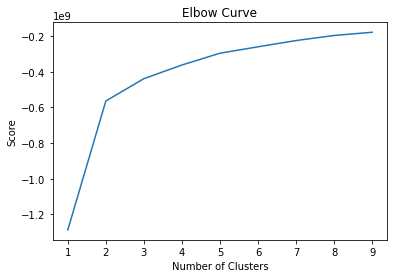

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Q4. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart. Explain why you chose that number in a markdown cell. As indicated in the visualization above, there is a significant jump from 2 to 3 on the x-axis making the optimal count for the number of clusters 3. 

### 05. k-Means Clustering

In [12]:
# Create the k-means object
kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [13]:
# Fit the k-means object to the data
kmeans.fit(df)

C:\Users\amwil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [14]:
# Create new column clusters to show 
df['Clusters'] = kmeans.fit_predict(df)

C:\Users\amwil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [15]:
# Check df for new column
df.head()

,Price,Minimum nights for rent,Number of reviews,Reviews per month,Number of listings per host,Availability per year,Clusters
0,149.0,1.0,9,0.210000,6,365,1
1,225.0,1.0,45,0.380000,2,355,1
2,150.0,3.0,0,1.373221,1,365,1
3,89.0,1.0,270,4.640000,1,194,1
4,80.0,10.0,9,0.100000,1,0,2


In [16]:
# Check frequency of clusters column
df['Clusters'].value_counts()

2    25359
1    15632
0     7904
Name: Clusters, dtype: int64

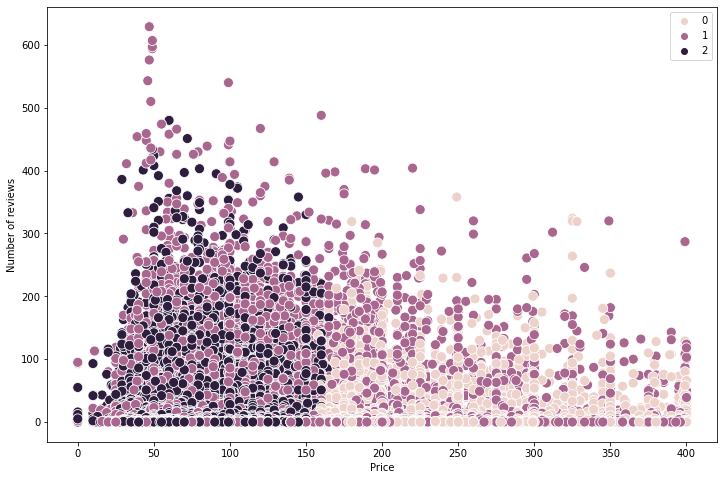

In [17]:
# Plot the clusters for the "Number of reviews" and "Price" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Price'], y=df['Number of reviews'], hue=kmeans.labels_, s=100)

# Remove the grid from the background
ax.grid(False) 

# Label x-axis
plt.xlabel('Price') 

# Label y-axis
plt.ylabel('Number of reviews') 

# View the scatterplot
plt.show()

#### Q8. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further. The purple cluster ( coded as "2" in the legend) overlaps alot with the other clusters. The greatest concentration of data points represented by the purple cluster and dark purple cluster (coded as "3" in the legend) indicate most reviews arise from rentals with a listing price of roughly 150 dollars or less. In general, these clusters have anywhere from 0 to 280 or so reviews. The higher priced listings represented by the pink cluster (coded as "0" in the legend) looks to have anywhere from 0 to 120 reviews.

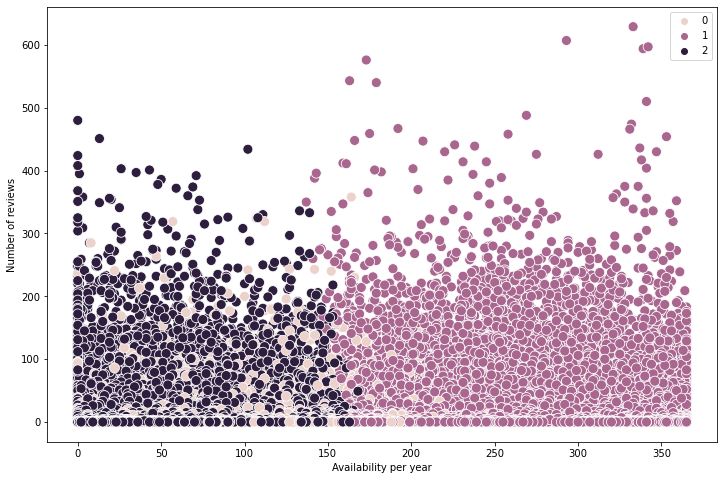

In [18]:
# Plot the clusters for the "Number of reviews" and "Availability per year" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Availability per year'], y=df['Number of reviews'], hue=kmeans.labels_, s=100)

# Remove the grid from the background
ax.grid(False) 

# Label x-axis
plt.xlabel('Availability per year') 

# Label y-axis
plt.ylabel('Number of reviews') 

# View the scatterplot
plt.show()

#### Q8. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further. In this visualization, the dark purple and pink clusters appear to mostly be available only 150 days or less per year and yield about 0 to 200 reviews. The purple cluster yields a bit more reviews (anywhere from 0 to 230) and is available a significant amount more than the dark purple and pink clusters. It makes sense that having more availability means more reviews since more availability allows for more opportunity for a rental to receive a review.

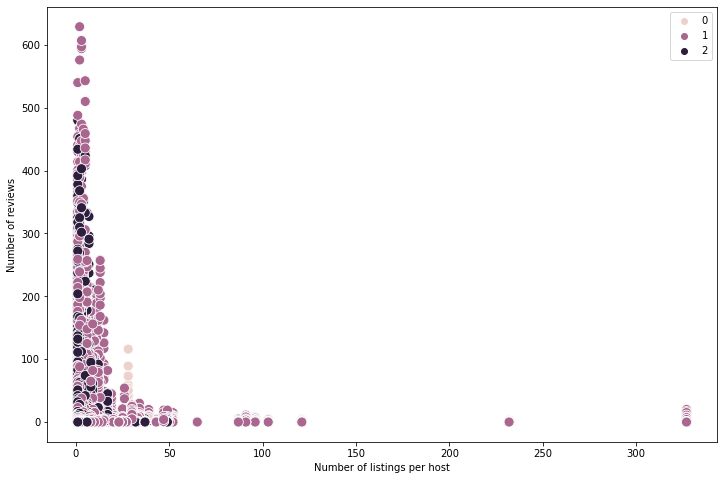

In [19]:
# Plot the clusters for the "Number of reviews" and "Minimum nights for rent" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Number of listings per host'], y=df['Number of reviews'], hue=kmeans.labels_, s=100)

# Remove the grid from the background
ax.grid(False) 

# Label x-axis
plt.xlabel('Number of listings per host') 

# Label y-axis
plt.ylabel('Number of reviews') 

# View the scatterplot
plt.show()

#### Q8. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further. The only thing that I can glean here is that most reviews arise from hosts with 20 listings or less.

In [20]:
# Substitute cluster color for cluster number
df.loc[df['Clusters'] == 2, 'Cluster'] = 'Dark purple'
df.loc[df['Clusters'] == 1, 'Cluster'] = 'Purple'
df.loc[df['Clusters'] == 0, 'Cluster'] = 'Pink'

In [21]:
# Calculate descriptive statistics for clusters using the groupby function
df.groupby('Cluster').agg({'Price':['mean', 'median'], 
                         'Minimum nights for rent':['mean', 'median'], 
                         'Number of reviews':['mean', 'median'],
                         'Reviews per month':['mean', 'median'],  
                         'Number of listings per host':['mean', 'median'],
                         'Availability per year':['mean', 'median']})

Price        Minimum nights for rent         \
                   mean median                    mean median   
Cluster                                                         
Dark purple   88.745652   85.0                2.900627    2.0   
Pink         237.488740  220.0                3.003796    2.0   
Purple       128.353250  100.0                2.464496    2.0   

            Number of reviews        Reviews per month            \
                         mean median              mean    median   
Cluster                                                            
Dark purple         18.565992      4          1.262561  1.000000   
Pink                15.277961      4          1.178096  1.000000   
Purple              34.956052      9          1.651401  1.373221   

            Number of listings per host        Availability per year         
                                   mean median                  mean median  
Cluster                                                                      
Dark purple                    1.808944      1             26.931425      0  
Pink                           4.704200      1             41.108173      4  
Purple                        17.032369      2            288.291325    305

#### Q9. Discuss the findings of the descriptive statistics of the clusters. The purple cluster stands out as having the lowest prices for rental listings. For every other category, it's pretty much on par with the pink cluster with the exception of availability per year where the listings are available 15 days less per year. The purple cluster stands out as being medially priced and having the highest average number of reviews, listings per host, and availability per year.

#### Q10. Propose what these results could be useful for in future steps of an analytics pipeline. The cluster analysis allows for the categorization of the data points into groups. Once the data points have been categorized into groups, a classification algorithm can be used to make predictions about the groups. 